# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Dataset

In [2]:
data = pd.read_csv('unemployment_data.csv')

# Display the first few rows of the dataset

In [3]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


# Step 2: Check for Missing Values

In [4]:
print("\nMissing Values Summary:")
print(data.isnull().sum())
# Handle missing values if necessary (e.g., fill or drop)
# Example: Fill missing values with the mean of the respective column
data.fillna(data.mean(numeric_only=True), inplace=True)


Missing Values Summary:
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


# Step 3: Explore the Data

In [5]:
print("\nDataset Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          768 non-null    float64
 4    Estimated Employed                       768 non-null    float64
 5    Estimated Labour Participation Rate (%)  768 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None

Summary Statistics:
       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       768.000000        7.680000e+02   
mean                         11.

In [9]:
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


#Step 4: Visualize Unemployment Trends

In [6]:
# Assuming the dataset contains 'Date', 'Region', and 'Unemployment Rate' columns
# Convert 'Date' to a datetime format if necessary
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

# Plot Unemployment Rate Over Time

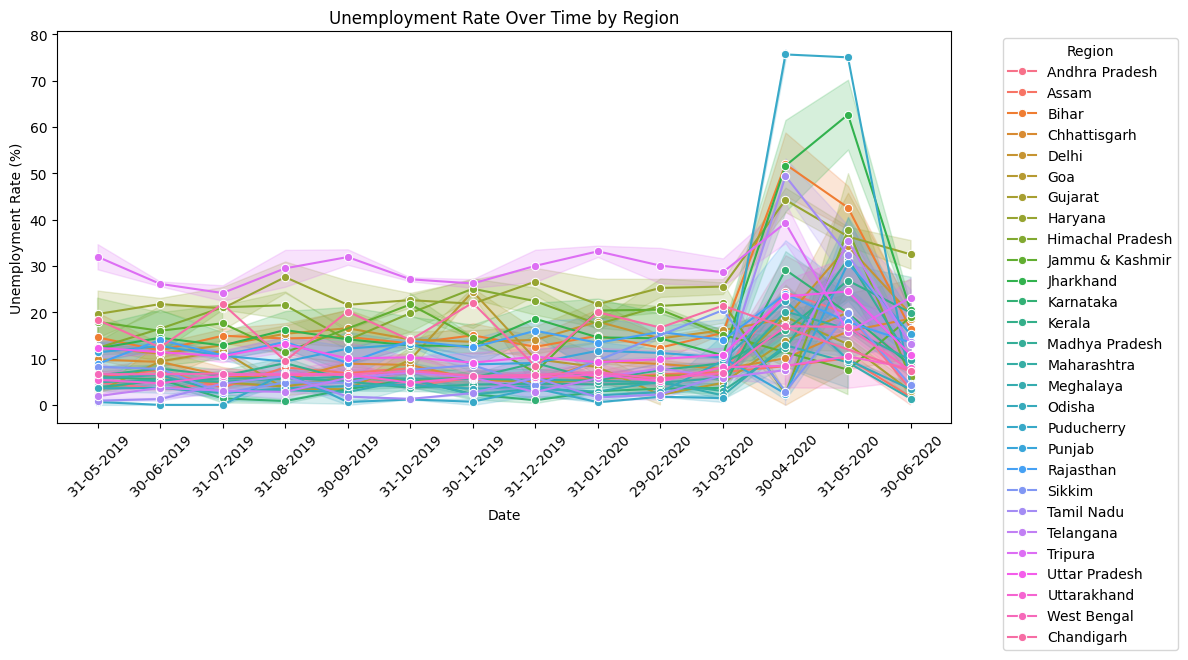

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x=' Date', y=' Estimated Unemployment Rate (%)', hue='Region', marker='o')
plt.title("Unemployment Rate Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Step 5: Regional Analysis

<ipython-input-14-75d3f365f963>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Region', y=' Estimated Unemployment Rate (%)', palette='Set3')


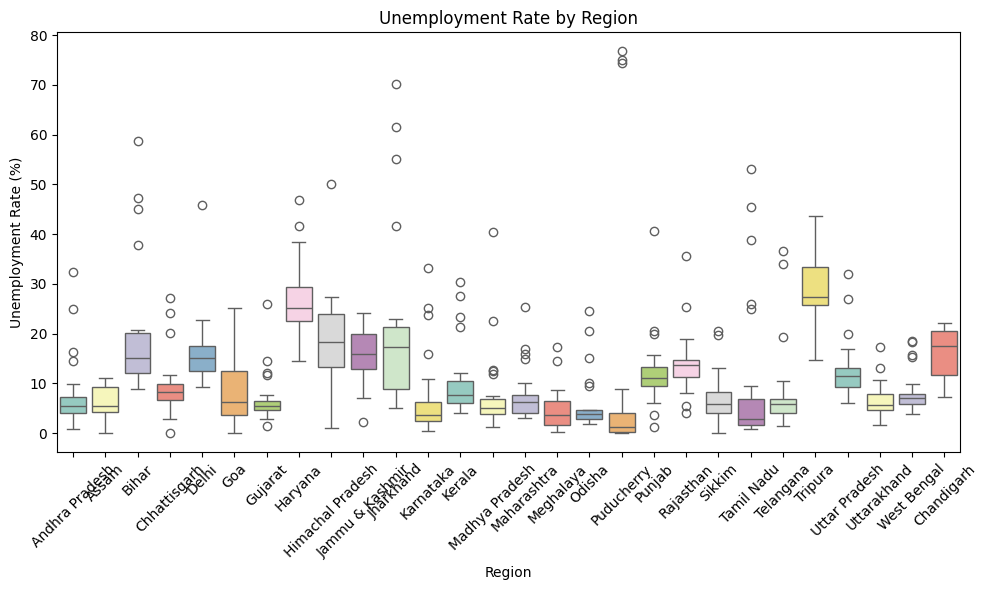

In [14]:
# Boxplot of Unemployment Rate by Region
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Region', y=' Estimated Unemployment Rate (%)', palette='Set3')
plt.title("Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Correlation Analysis

In [15]:
#(if other numerical variables are present)
if 'Unemployment Rate' in data.select_dtypes(include=['float', 'int']):
    correlation_matrix = data.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

# Step 7: Insights and Conclusions


In [17]:
# Display regions with the highest unemployment rates
highest_unemployment = data.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
print("\nRegions with the highest average unemployment rates:")
print(highest_unemployment.head())


Regions with the highest average unemployment rates:
Region
Tripura             28.350357
Haryana             26.283214
Jharkhand           20.585000
Bihar               18.918214
Himachal Pradesh    18.540357
Name:  Estimated Unemployment Rate (%), dtype: float64
